### 3. Algorithm for concave function ✔︎

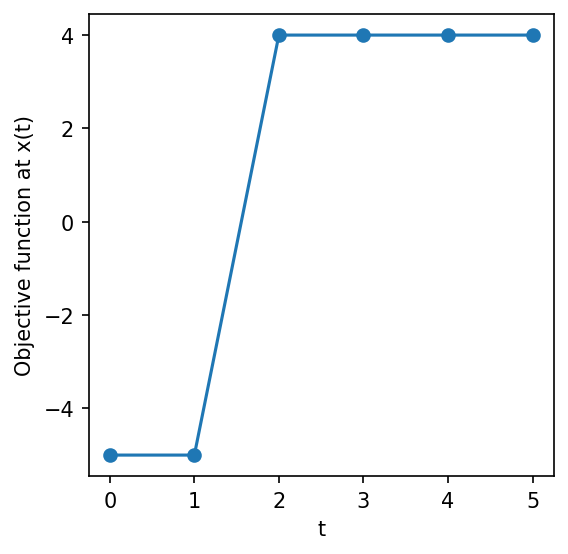

4.0


In [15]:
import matplotlib.pyplot as plt

ITER=5
x0=5

def obj(x): # objective function
    return 4*x - x**2

# gradient of objective function
def grad(x):
    return 4 - 2*x

# learning rate
def alpha(t):
    return 1/(2**t)

x=[x0]          # x(0)=5
fx = [obj(x0)]  # objective function

for t in range(ITER):
    # gradient descent
    x.append(x[t] + alpha(t)*grad(x[t]))
    # objective function at x(t)
    fx.append(obj(x[t+1]))
    
plt.figure(figsize=(4,4), dpi=150)
plt.plot(range(ITER+1),fx, 'o-')
plt.xlabel('t')
plt.ylabel('Objective function at x(t)')
plt.show()

print(max(fx))

### 4. 1st-order Wasserstein distance ?

Let $X \in \mathcal{X}:=\{-2,0,2\}$ be a discrete random variable with probability distribution: $\mathbb{P}_X(x)=\frac{1}{4}, \frac{1}{2}, \frac{1}{4}$ for $x=-2,0,2$, respectively. Let $Y \in \mathcal{Y}:=\{-4,-1,1,4\}$ be another discrete random variable with: $\mathbb{P}_Y(y)=\frac{3}{8}, \frac{1}{8}, \frac{1}{8}, \frac{3}{8}$ for $y=-4,-1,1,4$, respectively. Consider Monge's problem which can be formulated as follows. Given $\mathbb{P}_X$ and $\mathbb{P}_Y$,

$$
W\left(\mathbb{P}_X, \mathbb{P}_Y\right):=\min _{\mathbb{P}_{X, Y}} \mathbb{E}[\|X-Y\|]
$$

where the minimization is over all joint distributions $\mathbb{P}_{X, Y}$ respecting the marginals $\mathbb{P}_X$ and $\mathbb{P}_Y$ :

$$
\begin{array}{ll}
\sum_{y \in \mathcal{Y}} \mathbb{P}_{X, Y}(x, y)=\mathbb{P}_X(x) & \forall x \in \mathcal{X} \\
\sum_{x \in \mathcal{X}} \mathbb{P}_{X, Y}(x, y)=\mathbb{P}_Y(y) & \forall y \in \mathcal{Y}
\end{array}
$$


(b) Solve the optimization problem using CVXPY.

Hint: Given an optimization variable, say $z \in \mathbf{R}^d$, and $(w, A, b, C, e)$ that appear in the LP standard form, here is a sample script:

```python

import cvxpy as cp
import numpy as np

z = cp.Variable(d)
objective = cp.Minimize(np.transpose(w) @ z)
constraints = [A@z-b <= 0, C@z-e == 0]
prob = cp.Problem(objective, constraints)
prob.solve()

print("status: ", prob.status)
print("Optimal value: ", prob.value)
print("Optimal var: ", z.value)

```


In [13]:
import cvxpy as cp
import numpy as np

# Define the number of decision variables (12 variables for joint probabilities)
d = 12

# Create the decision variable z (joint probabilities P(x, y))
z = cp.Variable(d)

# Cost vector w (distance values from the cost matrix)
w = np.array([2, 1, 3, 6, 4, 1, 1, 4, 6, 3, 1, 2])

# Constraint matrix C (marginal constraints)
C = np.array([
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],   # x = -2
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],   # x = 0
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],   # x = 2
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],   # y = -4
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],   # y = -1
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],   # y = 1
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]    # y = 4
])

# Right-hand side of the constraints (marginal probabilities for X and Y)
e = np.array([1/4, 1/2, 1/4, 3/8, 1/8, 1/8, 3/8])

# Objective function to minimize (w^T * z)
objective = cp.Minimize(w.T @ z)

# Constraints: C @ z = e (marginal constraints)
constraints = [C @ z == e, z >= 0]

# Define and solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Output results
print("status: ", prob.status)
print("Optimal value: ", prob.value)
print("Optimal var: ", z.value)

status:  optimal
Optimal value:  2.2499999959404455
Optimal var:  [ 2.50000001e-01 -2.58787194e-10 -1.15711411e-10 -2.62340957e-10
  1.25000000e-01  1.25000000e-01  1.25000000e-01  1.25000000e-01
 -2.62340957e-10 -1.15711411e-10 -2.58787194e-10  2.50000001e-01]


In [16]:
import cvxpy as cp
import numpy as np

# Cost matrix C
C = np.array([[2, 1, 3, 6], 
              [4, 1, 1, 4], 
              [6, 3, 1, 2]])

# Probability distributions
P_X = np.array([0.25, 0.5, 0.25])  # Marginal for X
P_Y = np.array([0.375, 0.125, 0.125, 0.375])  # Marginal for Y

# Create a variable for the joint distribution
P = cp.Variable((3, 4), nonneg=True)

# Objective function: minimize sum of C * P
objective = cp.Minimize(cp.sum(cp.multiply(C, P)))
row_constraints = [cp.sum(P[i, :]) == P_X[i] for i in range(3)]
col_constraints = [cp.sum(P[:, j]) == P_Y[j] for j in range(4)]

constraints = row_constraints + col_constraints

prob = cp.Problem(objective, constraints)
prob.solve()

print("Status:", prob.status)
print("Optimal value (Wasserstein distance):", prob.value)
print("Optimal transport plan (P):\n", P.value)

Status: optimal
Optimal value (Wasserstein distance): 2.2500000003003793
Optimal transport plan (P):
 [[0.25  0.    0.    0.   ]
 [0.125 0.125 0.125 0.125]
 [0.    0.    0.    0.25 ]]


### 5. Linear classification

Consider the linear classification problem wherein the goal is to find a boundary of the line form that can distinguish legitimate emails from spams. We are given $\left\{\left(x^{(i)}, y^{(i)}\right)\right\}_{i=1}^m$ training dataset (given in the file "train.csv" uploaded on the course website). Here $x^{(i)}:=\left(x_1^{(i)}, x_2^{(i)}\right)$ indicates a feature vector of the $i$ th example and $y^{(i)}$ denotes its corresponding label (legitimate $=+1$; spam $=-1$ ).


(a) What are $m$ and dimension of $x^{(i)}$ ? ✔︎

Hint: You may want to use the following script:
```python 

import pandas as pd

data = pd.read_csv(’train.csv’)
X = data[['X1', 'X2']].values
y = data['Y'].values
m,n = X.shape
print(m,n)

```

(b) Use a Python code below to visualize the data points in the two-dimensional space. ✔︎

```python 
import matplotlib.pyplot as plt

X_y1 = X[y==+1] # legitimate
X_y0 = X[y==-1] # spam

plt.figure(figsize=(4,4), dpi=150)

plt.scatter(X_y1[:,0],X_y1[:,1],
            c=’blue’, label = ’legitimate’, marker=’o’)
plt.scatter(X_y0[:,0],X_y0[:,1],
            c=’red’, label = ’spam’, marker=’o’)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Visualization of data points')
plt.show()
```

(c) In class, we formulated a margin-based linear classifier as: ✔︎

$$
\begin{aligned}
& \min _{a, b, v^{(i)}} \sum_{i=1}^m v(i): \\
& \quad y^{(i)}\left(a^T x^{(i)}-b\right)+v^{(i)} \geq 1, \quad i \in\{1, \ldots, m\} \\
& \quad v^{(i)} \geq 0
\end{aligned}
$$

Using a code below, print out the optimal solution.

```python 
import cvxpy as cp

a = cp.Variable(n)
b = cp.Variable()
v = cp.Variable(m)

# constraints and the objective function
constraints = [y[i]*(X[i,:]@a-b) + v[i]>=1 for i in range(m)] + [v>=0]
objective = cp.Minimize(cp.sum(v))

prob = cp.Problem(objective, constraints)
prob.solve()

print('status: ', prob.status)
print('optimal_value: ', prob.value)
print('optimal_var: ')

print('a*: ',a.value)
print('b*: ',b.value)
print('v*: ',v.value)

```

In [3]:
import pandas as pd

data = pd.read_csv('data/train.csv')
X = data[['X1', 'X2']].values
y = data['Y'].values
m,n = X.shape
print(m,n)

100 2


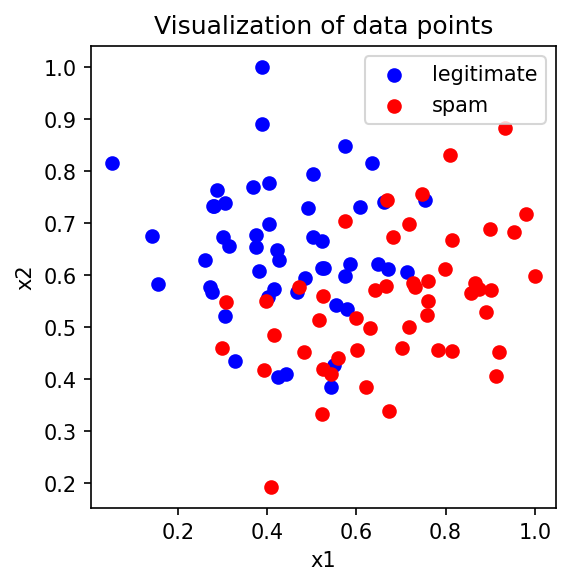

In [4]:
import matplotlib.pyplot as plt

X_y1 = X[y==+1] # legitimate
X_y0 = X[y==-1] # spam

plt.figure(figsize=(4,4), dpi=150)

plt.scatter(X_y1[:,0],X_y1[:,1],
            c='blue', label = 'legitimate', marker='o')
plt.scatter(X_y0[:,0],X_y0[:,1],
            c='red', label = 'spam', marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Visualization of data points')
plt.show()

In [5]:
import cvxpy as cp

a = cp.Variable(n)
b = cp.Variable()
v = cp.Variable(m)

# constraints and the objective function
constraints = [y[i]*(X[i,:]@a-b) + v[i]>=1 for i in range(m)] + [v>=0]
objective = cp.Minimize(cp.sum(v))

prob = cp.Problem(objective, constraints)
prob.solve()

print('status: ', prob.status)
print('optimal_value: ', prob.value)
print('optimal_var: ')

print('a*: ',a.value)
print('b*: ',b.value)
print('v*: ',v.value)

status:  optimal
optimal_value:  41.54029976997905
optimal_var: 
a*:  [-8.2837833   6.82321339]
b*:  -0.7073957937560789
v*:  [ 1.41543565e-11  8.81023997e-12 -2.26574547e-11  4.08315444e-12
 -9.12597570e-12 -3.39042997e-11  2.06243550e+00 -7.85937955e-12
  1.84170000e-11  1.04197303e+00  1.93654384e+00 -1.38437517e-12
  1.78559567e-11  5.78969044e-12  2.37423536e-11  1.43404557e-11
  2.82605184e-01  6.33878867e-12  7.23157864e-01 -1.29569827e-11
  1.04358755e-11  9.73673455e-01  6.75634803e-12  1.49794022e-11
  7.98618983e-12  1.46122616e+00  7.69977285e-12  2.15709326e+00
  1.61461408e-11  3.28065375e-01  9.68161739e-12  1.16498401e+00
  1.08795329e-11  1.63573164e-11  7.39197002e-02  1.66942660e+00
  1.42750349e+00  1.31313847e-11  2.54186549e-01  1.42950570e+00
  4.62450701e-01  6.52752093e-12 -1.32319901e-11  3.94301036e-02
  7.92374619e-12  1.19317718e+00  8.94556436e-10  9.01716876e-01
 -1.70439157e-11  4.32482335e-01  1.50868619e-11  7.39255112e-12
  1.49007878e-11  1.01576938e

### 7. Margin-based linear classifier vs. Least-Squares classifier 

Consider the legitimate-vs-spam email classification. We are given $\{(x^{(i)}, y^{(i)})\}^m_{i=1}$ training dataset (the same "train.csv" in Prob 5). In this problem, you will build up two classifiers: (i) the margin-based linear classifier; and (ii) the Least-Squares classifier (with a bias term). You will also compare the test error performances with test dataset $\{(x^{(i)}_{\text{test}}, y^{(i)}_{\text{test}})\}^{m_{\text{test}}}_{i=1}$ (given in "test.csv" uploaded). You need the write a script for Python implementation.

(b) Given the trained model $(a^*, b^*)$ in part (a), the margin-based linear classifier outputs: ✔︎

$$ y_{\text {test }}^{(i)}=\operatorname{sign}\left(a^{* T} x_{\text {test }}^{(i)}-b^*\right)$$

Using a Python code below, compute the test error of the margin-based linear classifier:

```python 
import pandas as pd
import numpy as np

test = pd.read_csv('test.csv')
Xtest = test[['X1', 'X2']].values
ytest = test['Y'].values
m_test, n = Xtest.shape

error_LP=np.sign(Xtest@a.value - b.value) != ytest
print("Test error of the MB linear classifier: ",
        sum(error_LP)/m_test)
```

(c) Formulate an optimization for the least-squares classifier. Using a Python code below, develop the LS classifier and print out $(w^*, c^*)$. ✔︎

```python 
import pandas as pd
import numpy as np
from numpy.linalg import pinv

data = pd.read_csv('train.csv')
X = data[['X1', 'X2']].values
y = data['Y'].values
m,n = X.shape

allone = np.ones((m,1))
A = np.concatenate((X,allone),1)

# closed form solution
w_bar_star = np.dot(pinv(A),y)

print('w*:', w_bar_star[0:2])
print('c*:', w_bar_star[2])
```

(d) Double-check your answer in part (c) using the following CVXPY script: ✔︎

```python 
import pandas as pd
import cvxpy as cp
import numpy as np

data = pd.read_csv('train.csv')
X = data[['X1', 'X2']].values
y = data['Y'].values
m,n = X.shape

w = cp.Variable(n)
c = cp.Variable()

# constraints and the objective function
objective = cp.Minimize( cp.sum((X@w+c -y)**2) )
prob = cp.Problem(objective)
prob.solve()

print('status: ', prob.status)
print('optimal value: ', prob.value)
print('optimal var: ')
print('w*: ',w.value)
print('c*: ',c.value)
```

(e) Given the trained model $\left(w^*, c^*\right)$ in part $(c)$, the LS classifier outputs: ✔︎
$$
y_{\text {test }}^{(i)}=\operatorname{sign}\left(w^{* T} x_{\text {test }}^{(i)}+c^*\right)
$$
Using a Python code, compute the test error of the LS classifier. Which classifier is better between the LS classifier and the margin-based linear classifier?

In [11]:
import pandas as pd
import numpy as np

test = pd.read_csv('data/test.csv')
Xtest = test[['X1', 'X2']].values
ytest = test['Y'].values
m_test, n = Xtest.shape

error_LP=np.sign(Xtest@a.value - b.value) != ytest
print("Test error of the MB linear classifier: ",
        sum(error_LP)/m_test)

Test error of the MB linear classifier:  0.3


In [8]:
import pandas as pd
import numpy as np
from numpy.linalg import pinv

data = pd.read_csv('data/train.csv')
X = data[['X1', 'X2']].values
y = data['Y'].values
m,n = X.shape

allone = np.ones((m,1))
A = np.concatenate((X,allone),1)

# closed form solution
w_bar_star = np.dot(pinv(A),y)

print('w*:', w_bar_star[0:2])
print('c*:', w_bar_star[2])

w*: [-2.78936974  2.47860887]
c*: 0.08502008955833901


In [10]:
import pandas as pd
import cvxpy as cp
import numpy as np

data = pd.read_csv('data/train.csv')
X = data[['X1', 'X2']].values
y = data['Y'].values
m,n = X.shape

w = cp.Variable(n)
c = cp.Variable()

# constraints and the objective function
objective = cp.Minimize( cp.sum((X@w+c -y)**2) )
prob = cp.Problem(objective)
prob.solve()

print('status: ', prob.status)
print('optimal value: ', prob.value)
print('optimal var: ')
print('w*: ',w.value)
print('c*: ',c.value)

status:  optimal
optimal value:  52.3986111459343
optimal var: 
w*:  [-2.78936974  2.47860887]
c*:  0.08502008955833724


In [12]:
import pandas as pd
import numpy as np

test = pd.read_csv('data/test.csv')
Xtest = test[['X1', 'X2']].values
ytest = test['Y'].values
m_test, n = Xtest.shape

error_LS = np.sign(Xtest@w.value - c.value) != ytest
print("Test error of the LS linear classifier: ",
        sum(error_LS)/m_test)

Test error of the LS linear classifier:  0.2
